In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as kf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [13]:
def chng(x):
    if x==-1:
        return 0
    return x

In [14]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history= [ ]
        self.w_list = [ ]

    def fit(self, X, y):
        
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        eps=10**-10
        
        # gradient descent
        for _ in range(self.n_iters):
            
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update parameters
            # w_prev = self.weights
            # w0_prev = self.bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            #appending cost and w values
            
            cost = -np.sum( y * np.log(y_predicted) + (1-y) * np.log(1 - y_predicted))
            
            w=list(self.weights)
            w.append(self.bias)
            self.w_list.append(w)
            self.cost_history.append(cost)
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return y_predicted

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def score(self,x_test,y_test):
        y_p = self.predict(x_test)
        correct = 0
        for i in range(len(y_p)):
            if y_p[i]==y_test[i]:
                correct+=1
        return correct/len(y_p)

In [16]:
df2= pd.read_csv('data2.csv', header= None)

In [17]:
df2.head()

,0,1,2,3
0,69,16,54,1
1,59,18,79,1
2,89,1,81,1
3,84,14,20,1
4,92,48,73,1


In [18]:
df2[3].unique()

array([ 1, -1], dtype=int64)

In [19]:
df2[3] = df2[3].apply(lambda x:chng(x))
df2[3].unique()

array([1, 0], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df2[[0,1,2]],df2[3])

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
k=kf(n_splits=5)
X_train=np.array(X_train)

X_train=np.array(X_train)
lr_range = [10**i for i in range(-5,3)]
for j in lr_range :
    for train_index,test_index in k.split(X_train,y_train):
        reg=LogisticRegression(learning_rate=j,n_iters=1000)
        reg.fit(X_train[train_index],y_train[train_index])
    print("Learning rate:",j," \tand Score is :",reg.score(X_train[test_index],y_train[test_index]))

Learning rate: 1e-05  	and Score is : 1.0
Learning rate: 0.0001  	and Score is : 1.0
Learning rate: 0.001  	and Score is : 1.0


E:\Python\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
E:\Python\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


Learning rate: 0.01  	and Score is : 1.0
Learning rate: 0.1  	and Score is : 1.0


E:\Python\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in exp


Learning rate: 1  	and Score is : 1.0
Learning rate: 10  	and Score is : 1.0
Learning rate: 100  	and Score is : 1.0


In [24]:
reg=LogisticRegression(learning_rate=0.00005)

In [25]:
reg.fit(X_train,y_train)

In [26]:
reg.cost_history

[103.9720770839918,
 102.73493651774947,
 101.53989230836278,
 100.38312535029033,
 99.2614540576036,
 98.17221353892538,
 97.1131572643296,
 96.08237731910896,
 95.07823991753453,
 94.09933338008807,
 93.14442624726816,
 92.21243360900988,
 91.3023900736481,
 90.413428089675,
 89.54476057392124,
 88.69566699803657,
 87.86548224769393,
 87.05358770161273,
 86.25940408537551,
 85.48238574246878,
 84.72201603569783,
 83.97780364918731,
 83.24927960713887,
 82.53599486247211,
 81.83751833814833,
 81.15343532777045,
 80.48334618110944,
 79.82686521545075,
 79.18361980583649,
 78.55324961699992,
 77.93540594754056,
 77.3297511630602,
 76.73595819988934,
 76.15371012493435,
 75.58269974026794,
 75.02262922353817,
 74.47320979720827,
 73.93416142117087,
 73.40521250448593,
 72.88609963294005,
 72.3765673098691,
 71.87636770826762,
 71.3852604326623,
 70.90301228958006,
 70.42939706571309,
 69.96419531309412,
 69.50719414075579,
 69.0581870124698,
 68.61697355025484,
 68.18335934341,
 67.75715

In [33]:
reg.score(X_test,y_test)

1.0

## Perforamance Measure:

In [28]:
def calc(cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    pr = tp/(tp+fp)
    fm = 2*(pr*sn)/(pr+sn)
    print(f"Sensitivity is {sn}")
    print(f"Specificity is {sp}")
    print(f"Precission is {pr}")
    print(f"F_measur is {fm}")

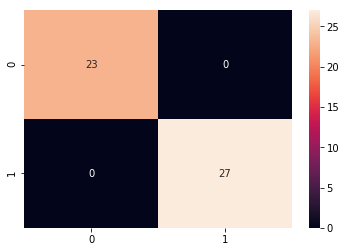

In [29]:
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True)

In [31]:
calc(cm)

Sensitivity is 1.0
Specificity is 1.0
Precission is 1.0
F_measur is 1.0


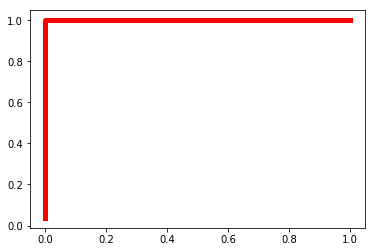

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

tpr,fpr,threshold=roc_curve(y_test , reg.predict_prob(X_test),drop_intermediate=False)
plt.plot(tpr,fpr,color='red',lw=5)
plt.show()

In [33]:
reg.weights

array([ 0.03211375, -0.11103683,  0.06106608])

In [34]:
reg.bias

0.0006228593011385866

Text(0,0.5,'LogistiicReg Values')

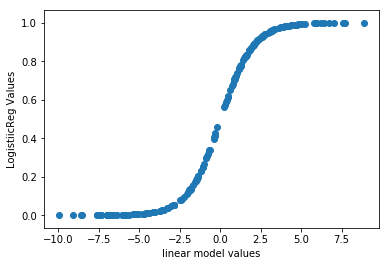

In [35]:
linear_model = np.dot(df2[[0,1,2]],reg.weights) + reg.bias
y = 1 / (1 + np.exp(-linear_model))
plt.scatter(linear_model,y)
plt.xlabel("linear model values")
plt.ylabel("LogistiicReg Values")

Text(0,0.5,'Cost')

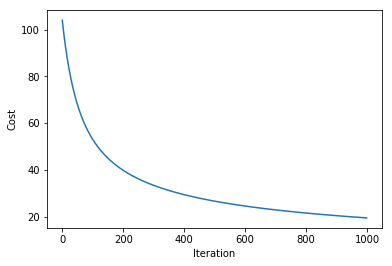

In [36]:
plt.plot(list(range(len(reg.cost_history))),reg.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [37]:
os.chdir(r"E:\M.Tech IIST\Data Mining\Assignment\Assignment 3")
df3= pd.read_csv('data3.csv', header= None)

In [38]:
df3.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


In [39]:
df3[2].unique()

array([1, 0], dtype=int64)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df3[[0,1]],df3[2])

In [41]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [42]:
k=kf(n_splits=5)
X_train=np.array(X_train)

X_train=np.array(X_train)
lr_range = [10**i for i in range(-5,3)]
for j in lr_range :
    for train_index,test_index in k.split(X_train,y_train):
        reg=LogisticRegression(learning_rate=j,n_iters=1000)
        reg.fit(X_train[train_index],y_train[train_index])
    print("Learning rate:",j," and Score is :",reg.score(X_train[test_index],y_train[test_index]))

Learning rate: 1e-05  and Score is : 1.0
Learning rate: 0.0001  and Score is : 1.0
Learning rate: 0.001  and Score is : 1.0
Learning rate: 0.01  and Score is : 1.0
Learning rate: 0.1  and Score is : 1.0


E:\Python\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
E:\Python\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


Learning rate: 1  and Score is : 1.0


E:\Python\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in exp


Learning rate: 10  and Score is : 1.0
Learning rate: 100  and Score is : 1.0


In [43]:
reg3=LogisticRegression(learning_rate=0.1)

In [44]:
reg3.fit(X_train,y_train)

In [45]:
reg3.cost_history

[103.9720770839918,
 0.7067211865904663,
 0.7004110047735924,
 0.6942446651838804,
 0.688216896554368,
 0.6823226910639828,
 0.6765572877756465,
 0.6709161573226953,
 0.6653949877343095,
 0.659989671301608,
 0.6546962923955898,
 0.6495111161568127,
 0.6444305779842923,
 0.6394512737579773,
 0.6345699507353224,
 0.6297834990678538,
 0.625088943888703,
 0.620483437926349,
 0.6159642546039132,
 0.6115287815868287,
 0.6071745147450252,
 0.6028990524986146,
 0.5987000905187336,
 0.5945754167575823,
 0.5905229067838249,
 0.5865405194015642,
 0.5826262925327395,
 0.5787783393445612,
 0.5749948446049759,
 0.5712740612504988,
 0.5676143071520452,
 0.564013962065401,
 0.5604714647540874,
 0.5569853102732276,
 0.5535540474039451,
 0.550176276228558,
 0.5468506458375411,
 0.5435758521599348,
 0.5403506359094447,
 0.5371737806390211,
 0.534044110897261,
 0.5309604904803932,
 0.5279218207740775,
 0.524927039179639,
 0.5219751176197003,
 0.5190650611185765,
 0.5161959064530114,
 0.5133667208692375,
 

In [46]:
reg3.score(X_test,y_test)

1.0

E:\Python\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in exp


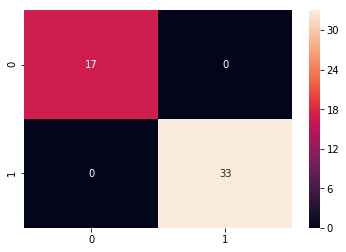

In [47]:
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True)

In [48]:
reg3.weights

array([-0.96836455, -0.67003056])

In [49]:
reg3.bias

-0.03305144303704238